LOGISTIC REGRESSION

In [ ]:
from google.colab import files
uploaded = files.upload()

: 

In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# imports
import pandas as pd # For handling and manipulating the data.
import numpy as np # For handling and manipulating the data.
from sklearn.model_selection import train_test_split #To divide data into training and testing sets.
from sklearn.linear_model import LogisticRegression #The machine learning model we'll train.
from sklearn.metrics import accuracy_score #To evaluate how well our model performs.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
# Fill missing Age with median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-462348791.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)


In [ ]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#because ML models can't use strings, so we convert male -> 0, female -> 1 and "s: 0, c: 1, Q: 2"

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [ ]:
#We select only the columns we want to use as input features.
# Step: Create new feature
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

# Step: Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = df_train[features]
y = df_train['Survived']

#x: feature set (input); y: label (output)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% training, 20% testing, random_state=42 ensures you get the same split every time (for reproducibility)

In [ ]:
model = LogisticRegression(max_iter=200) #max number of training cycles
model.fit(X_train, y_train) #trains the model on our training data

LogisticRegression(max_iter=200)

<Figure size 500x500 with 0 Axes>

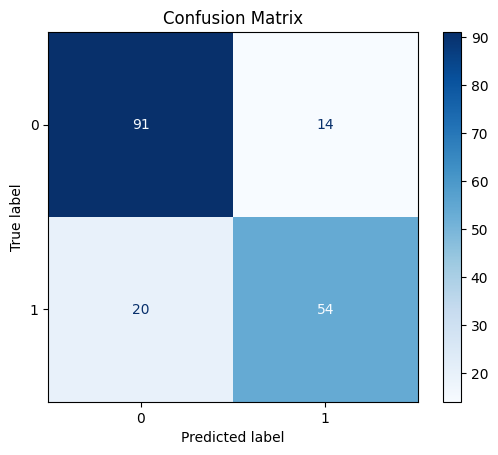

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(5,5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

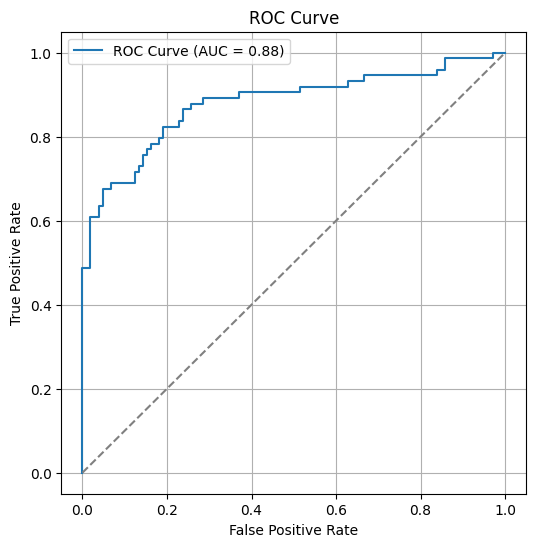

In [ ]:

# Predict probabilities instead of labels
y_probs = model.predict_proba(X_test)[:, 1]  # Get prob for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
#We use the trained model to predict on the test set
#Then compare those predictions (y_pred) to the true labels (y_test)
#accuracy_score gives the percentage of correct predictions

Accuracy: 0.8101
